In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers

In [2]:
# Load data
stocks_data = pd.read_pickle('data/nasdaq100_6y.pkl')
index_data = pd.read_pickle('data/nasdaq100_index_6y.pkl')
assets_names = stocks_data.columns.values

data_assets = stocks_data
data_index = index_data

print("Stocks data (time series) shape: {shape}".format(shape=stocks_data.shape))
print("Index data (time series) shape: {shape}".format(shape=index_data.shape))

stocks_data.head()

Stocks data (time series) shape: (1512, 91)
Index data (time series) shape: (1512,)


,ATVI,ADBE,AMD,ALGN,GOOGL,GOOG,AMZN,AAL,AMGN,ADI,...,VRSN,VRSK,VRTX,WBA,WDAY,WDC,WLTW,WYNN,XEL,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-30,37.931797,95.279999,2.98,66.099998,790.299988,771.000000,689.070007,40.901630,137.723129,49.810318,...,88.139999,76.025185,126.400002,72.629318,80.279999,52.720818,118.801224,62.168110,30.473986,43.330223
2015-12-31,37.239155,93.940002,2.87,65.849998,778.010010,758.880005,675.890015,40.471584,136.913467,48.726913,...,87.360001,75.407249,125.830002,71.595238,79.680000,51.823299,117.903053,62.666264,30.063749,42.542248
2016-01-04,36.190571,91.970001,2.77,64.269997,759.440002,741.840027,636.989990,39.095459,133.548172,47.951786,...,83.949997,73.857529,122.889999,69.821350,77.760002,52.125347,114.528839,62.285854,29.887941,41.482540
2016-01-05,35.728809,92.339996,2.75,64.949997,761.530029,742.580017,633.789978,38.722763,133.404785,47.599461,...,81.410004,73.592690,123.449997,67.988579,77.239998,51.900967,115.316803,63.463291,30.189337,42.098431
2016-01-06,35.392109,91.019997,2.51,64.870003,759.330017,743.619995,632.650024,39.401268,132.181839,45.573589,...,81.019997,73.210167,122.230003,66.946083,74.400002,50.744545,115.316803,60.175549,30.507462,41.328568


In [3]:
# Split data
n_train = int(data_assets.shape[0]*0.8)

# Stocks data
X_train = data_assets.values[:n_train, :]
X_test = data_assets.values[n_train:, :]

# Index data
index_train = data_index[:n_train]
index_test = data_index[n_train:]

In [4]:
# Normalize data
scaler = MinMaxScaler([0, 1])
# Stocks data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Index data
scaler_index = MinMaxScaler([0, 1])
index_train = scaler_index.fit_transform(index_train[:, np.newaxis])
index_test = scaler_index.fit_transform(index_test[:, np.newaxis])

/opt/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/opt/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


In [5]:
## Autoencoder - Keras

# Network hyperparameters
n_inputs = X_train.shape[1]

# Training hyperparameters
epochs = 50
batch_size = 1

# Define model
input = Input(shape=(n_inputs,))
# Encoder Layers
encoded = Dense(8, input_shape=(n_inputs,), activation='relu')(input)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(n_inputs, activation='sigmoid')(decoded)

# Encoder
encoder = Model(input, encoded)

# Autoencoder
model = Model(input, decoded)

In [6]:
# Compile autoencoder
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 91)]              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 736       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 91)                819       
Total params: 1,631
Trainable params: 1,631
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Fit the model
history = model.fit(X_train,
                    X_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    verbose=1
                    )

Epoch 1/50
1209/1209 [==============================] - 1s 850us/step - loss: 0.0494
Epoch 2/50
1209/1209 [==============================] - 1s 830us/step - loss: 0.0146
Epoch 3/50
1209/1209 [==============================] - 1s 941us/step - loss: 0.0117
Epoch 4/50
1209/1209 [==============================] - 1s 744us/step - loss: 0.0109
Epoch 5/50
1209/1209 [==============================] - 1s 778us/step - loss: 0.0094
Epoch 6/50
1209/1209 [==============================] - 1s 838us/step - loss: 0.0084
Epoch 7/50
1209/1209 [==============================] - 1s 807us/step - loss: 0.0080
Epoch 8/50
1209/1209 [==============================] - 1s 793us/step - loss: 0.0072
Epoch 9/50
1209/1209 [==============================] - 1s 789us/step - loss: 0.0069
Epoch 10/50
1209/1209 [==============================] - 1s 1ms/step - loss: 0.0065
Epoch 11/50
1209/1209 [==============================] - 1s 994us/step - loss: 0.0061
Epoch 12/50
1209/1209 [==============================] - 1s 1ms/s

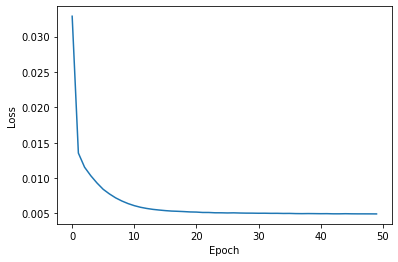

In [8]:
# Visualize loss history
plt.figure()
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
#plt.savefig('images/DAE_loss.eps', bbox_inches='tight')

In [9]:
#from keras.models import model_from_json
#
## Save model
## serialize model to JSON
#model_json = model.to_json()
#with open("models/DAE_model.json", "w") as json_file:
#    json_file.write(model_json)
## serialize weights to HDF5
#model.save_weights("models/DAE_model.h5")

In [10]:
#from keras.models import model_from_json
#
## load json and create model
#json_file = open('models/DAE_model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#model = model_from_json(loaded_model_json)
## load weights into new model
#model.load_weights("models/DAE_model.h5")

In [11]:
# Evaluate model
score_train = model.evaluate(X_train, X_train, batch_size=batch_size)
score_test = model.evaluate(X_test, X_test, batch_size=batch_size)

print('Training MSE: %.8f' %score_train)
print('Training MSE: %.8f' %score_test)

303/303 [==============================] - 0s 944us/step - loss: 0.0552
Training MSE: 0.00491864
Training MSE: 0.05517435


In [12]:
# Obtain reconstruction of the stocks
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

error = np.mean(np.abs(X_train - X_train_pred)**2, axis=0)
print('Training MSE: %.8f' %np.mean(error))

error_test = np.mean(np.abs(X_test - X_test_pred)**2, axis=0)
print('Testing MSE: %.8f' %np.mean(error_test))

Training MSE: 0.00491864
Testing MSE: 0.05517435


In [13]:
# Sort stocks by reconstruction error
ind = np.argsort(error)
sort_error = error[ind]
sort_assets_names = assets_names[ind]

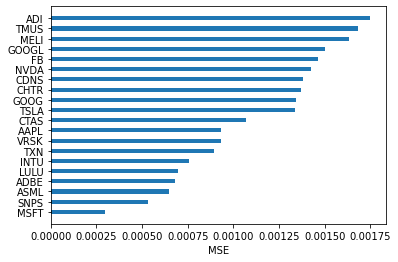

In [14]:
# Barplot
plt.figure()
plt.barh(2*np.arange(len(error[:20])), error[ind[:20]], tick_label=assets_names[ind[:20]])
plt.xlabel('MSE')
plt.show()
#plt.savefig('images/DAE_MSEbar.eps', bbox_inches='tight')

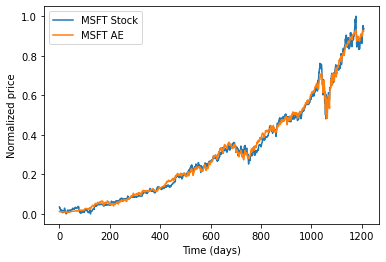

In [15]:
# Plot stock
i=0
plt.figure()
plt.plot(X_train[:, ind[i]], label=assets_names[ind[i]] + ' Stock')
plt.plot(X_train_pred[:, ind[i]], label=assets_names[ind[i]] + ' AE')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()
#plt.savefig('images/DAE_' + assets_names[ind[i]] + '.eps', bbox_inches='tight')

In [16]:
# Identify stocks
n = 5

portfolio_train = X_train_pred[:, ind[:n]]
portfolio_test = X_test_pred[:, ind[:n]]

# Create portfolio in-sample
tracked_index_insample = np.mean(portfolio_train, axis=1)

# Create portfolio out-sample
tracked_index_outofsample = np.mean(portfolio_test, axis=1)

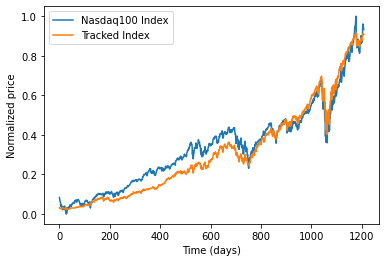

In [17]:
# In-sample
plt.figure()
plt.plot(index_train, label='Nasdaq100 Index')
plt.plot(tracked_index_insample, label='Tracked Index')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()
#plt.savefig('images/DAE_insample.png', bbox_inches='tight')

In [18]:
# Correlation coefficient (in-sample)
corr_train = np.corrcoef(index_train.squeeze(), tracked_index_insample)[0, 1]
print('Correlation coefficient (in-sample): %.8f' %corr_train)

Correlation coefficient (in-sample): 0.98487414


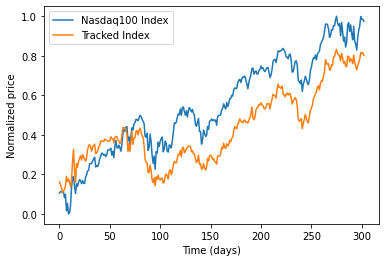

In [19]:
# Plot tracked index (out-of-sample)
plt.figure()
plt.plot(index_test, label='Nasdaq100 Index')
plt.plot(tracked_index_outofsample, label='Tracked Index')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Normalized price')
plt.show()
#plt.savefig('images/DAE_outofsample.png', bbox_inches='tight')

In [20]:
# Correlation coefficient (out-of-sample)
corr_test = np.corrcoef(index_test.squeeze(), tracked_index_outofsample)[0, 1]
print('Correlation coefficient: %.8f' %corr_test)

Correlation coefficient: 0.91380397
